In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#delete 4 value caa columns
df= df[df['caa']<4]

In [ ]:
df['caa'].value_counts()


0    175
1     65
2     38
3     20
Name: caa, dtype: int64

In [ ]:
x = df[['age' , 'sex', 'cp' , 'trtbps' , 'chol', 'fbs' , 'restecg' , 'thalachh' , 'exng' , 'caa',]]
x = np.asarray(x)
x[0:5]

array([[ 63,   1,   3, 145, 233,   1,   0, 150,   0,   0],
       [ 37,   1,   2, 130, 250,   0,   1, 187,   0,   0],
       [ 41,   0,   1, 130, 204,   0,   0, 172,   0,   0],
       [ 56,   1,   1, 120, 236,   0,   1, 178,   0,   0],
       [ 57,   0,   0, 120, 354,   0,   1, 163,   1,   0]])

In [ ]:
y = df['output']
y = np.asarray(y)
y[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (238, 10) (238,)
Test set: (60, 10) (60,)


#**SVM**

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score
kerl = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel1 in kerl:
  clf = svm.SVC(kernel = kernel1)
  clf.fit(X_train, y_train) 
  yhat = clf.predict(X_test)
  yhat [0:5]
  print(kernel1 , f1_score(y_test, yhat, average='weighted'))


linear 0.8622710622710623
poly 0.7777710661431593
rbf 0.72
sigmoid 0.44999999999999996


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.83      0.97      0.90        36

    accuracy                           0.87        60
   macro avg       0.89      0.84      0.85        60
weighted avg       0.88      0.87      0.86        60

Confusion matrix, without normalization
[[17  7]
 [ 1 35]]


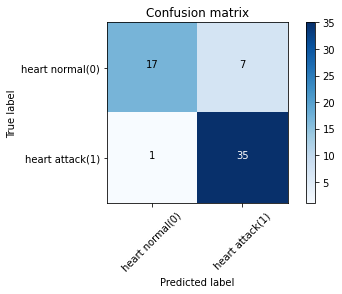

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['heart normal(0)','heart attack(1)'],normalize= False,  title='Confusion matrix')

#**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8333333333333334


In [ ]:
X1 = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
X1[0:5]

array([[ 0.94,  0.69,  1.98,  0.76, -0.27,  2.4 , -1.  ,  0.02, -0.7 ,
        -0.72],
       [-1.94,  0.69,  1.01, -0.09,  0.06, -0.42,  0.91,  1.64, -0.7 ,
        -0.72],
       [-1.5 , -1.45,  0.04, -0.09, -0.83, -0.42, -1.  ,  0.98, -0.7 ,
        -0.72],
       [ 0.17,  0.69,  0.04, -0.66, -0.21, -0.42,  0.91,  1.24, -0.7 ,
        -0.72],
       [ 0.28, -1.45, -0.93, -0.66,  2.07, -0.42,  0.91,  0.59,  1.43,
        -0.72]])

#**KNN**

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y, test_size=0.2, random_state=4)
print ('Train set:', X_train1.shape,  y_train1.shape)
print ('Test set:', X_test1.shape,  y_test1.shape)

Train set: (238, 10) (238,)
Test set: (60, 10) (60,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train1,y_train1)
yhat1 = neigh.predict(X_test1)
yhat1[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train1, neigh.predict(X_train1)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test1, yhat1))

Train set Accuracy:  0.819327731092437
Test set Accuracy:  0.7833333333333333
